# Spectral Clustering
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **KNN graph** and other necessary algorithms for **spectral clustering**
- play with the **threshold** of spectral clustering
- apply spectral clustering on toy data and **real world data**, and compare it with k-means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [2]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
from cluster_plot import cluster_plot

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Experiment Spectral Clustering on synthesis data

In [25]:
cluster_data = sio.loadmat('cluster_data.mat')
X = cluster_data['X']

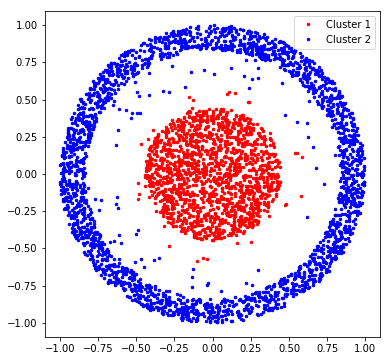

In [33]:
# Uncomment following two line and choose proper parameters
k_in_knn_graph = 100
threshold = 0.5

# implement knn_graph in knn_graph.py
from knn_graph import knn_graph

W = knn_graph(X, k_in_knn_graph, sigma)

# implement spectral in spectral
from spectral import spectral

idx = spectral(W, 2)
cluster_plot(X, idx)

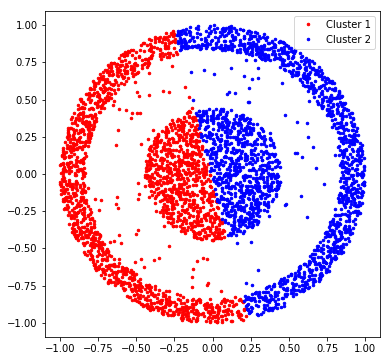

In [18]:
from kmeans import kmeans

idx = kmeans(X, 2)
cluster_plot(X, idx)

## Let's try Spectral Clustering on real-world data!

In [13]:
TDT2_data = sio.loadmat('TDT2_data.mat')
fea = TDT2_data['fea']
gnd = TDT2_data['gnd'].reshape(-1)
print(fea.shape, gnd.shape[0])
print(np.bincount(gnd))
gnd[gnd == 4] = 0
gnd[gnd == 9] = 1
gnd[gnd == 13] = 2
gnd[gnd == 21] = 3
gnd[gnd == 26] = 4
print(np.bincount(gnd))

# fea = np.copy(fea.todense())
# maxv = np.max(fea, axis=0)
# minv = np.min(fea, axis=0)
# fea = (fea-minv)/(maxv-minv)

(1319, 14964) 1319
[  0   0   0   0 811   0   0   0   0 226   0   0   0 141   0   0   0   0
   0   0   0  76   0   0   0   0  65]
[811 226 141  76  65]


In [15]:
from constructW import constructW
from bestMap import bestMap
from MutualInfo import MutualInfo
from spectral import spectral
from kmeans import kmeans
# YOUR CODE HERE
# begin answer
k = 5
N = 10
W = np.copy(constructW(fea, NeighborMode='KNN', WeightMode='HeatKernel', k=5).todense())
fea = np.copy(fea.todense())
scAccuracy = 0
kmAccuracy = 0
scNMI = 0
kmNMI = 0

for i in range(N):
    print(i)
    L1 = spectral(W, k)
    gnd_hat1 = bestMap(gnd, L1)
    scAccuracy += np.sum(gnd_hat1 == gnd)/gnd.shape[0]
    scNMI += MutualInfo(gnd, gnd_hat1)

    L2 = kmeans(fea, k)
    gnd_hat2 = bestMap(gnd, L2)
    kmAccuracy += np.sum(gnd_hat2 == gnd)/gnd.shape[0]
    kmNMI += MutualInfo(gnd, gnd_hat2)

print('Spectral Clustering:')
print('Accuracy:', scAccuracy/N, 'MutualInfo:', scNMI/N)
print('KMeans:')
print('Accuracy:', kmAccuracy/N, 'MutualInfo:', kmNMI/N)
# end answer

0
1
2
3
4
5
6
7
8
9
Spectral Clustering:
Accuracy: 0.7501895375284305 MutualInfo: 0.6110580493886795
KMeans:
Accuracy: 0.5721758908263836 MutualInfo: 0.34322600844792983
